In [2]:
#importing all the libraries
import pandas as pd                #To manipulate data of excel file
import numpy as np                 #r mathematical calculations
import matplotlib.pyplot as plt    # For plotting graphs
from datetime import datetime      # To access datetime
from pandas import Series          # To work on series
%matplotlib inline                 
import warnings                    # To ignore the warnings
warnings.filterwarnings("ignore")  #
from openpyxl import load_workbook #to load excel file into program
import glob                        # helps in dealing with computer paths
import os                          #to deal with computer operating system

## Clustering and Predicting based only on demand data (1D data)

In [3]:
#initializing train1 dataframe from data of first day of JAN month
train1=pd.read_excel("/home/yash/Work/github/edf/UP4years.xlsx")
train1


,Date and Time,UP_DMD
0,2014-01-01 00:00:00,9437.337891
1,2014-01-01 00:15:00,9601.834961
2,2014-01-01 00:30:00,9575.406250
3,2014-01-01 00:45:00,9458.622070
4,2014-01-01 01:00:00,9384.458008
5,2014-01-01 01:15:00,9303.470703
6,2014-01-01 01:30:00,9136.831055
7,2014-01-01 01:45:00,9027.442383
8,2014-01-01 02:00:00,8939.310547
9,2014-01-01 02:15:00,8553.535156


In [4]:
demand_data=np.array(train1.iloc[:,1].values,dtype=float)
demand_data

array([ 9437.33789062,  9601.83496094,  9575.40625   , ...,
       14114.25      , 14364.05664062, 14413.1796875 ])

In [5]:
index=pd.DatetimeIndex(train1.iloc[:,0])
index

DatetimeIndex(['2014-01-01 00:00:00', '2014-01-01 00:15:00',
               '2014-01-01 00:30:00', '2014-01-01 00:45:00',
               '2014-01-01 01:00:00', '2014-01-01 01:15:00',
               '2014-01-01 01:30:00', '2014-01-01 01:45:00',
               '2014-01-01 02:00:00', '2014-01-01 02:15:00',
               ...
               '2017-03-31 21:30:13', '2017-03-31 21:45:00',
               '2017-03-31 22:00:00', '2017-03-31 22:15:00',
               '2017-03-31 22:30:00', '2017-03-31 22:45:00',
               '2017-03-31 23:00:00', '2017-03-31 23:15:00',
               '2017-03-31 23:30:00', '2017-03-31 23:45:00'],
              dtype='datetime64[ns]', name='Date and Time', length=113856, freq=None)

In [6]:
### Creating a temp dataframe and temp series on which we will perform work so as not to affect orig data
cols=['Demand']
temp_df=pd.DataFrame(demand_data,index,cols)
temp_df

,Demand
Date and Time,
2014-01-01 00:00:00,9437.337891
2014-01-01 00:15:00,9601.834961
2014-01-01 00:30:00,9575.406250
2014-01-01 00:45:00,9458.622070
2014-01-01 01:00:00,9384.458008
2014-01-01 01:15:00,9303.470703
2014-01-01 01:30:00,9136.831055
2014-01-01 01:45:00,9027.442383
2014-01-01 02:00:00,8939.310547


In [7]:
hourly = temp_df.resample('H').max()

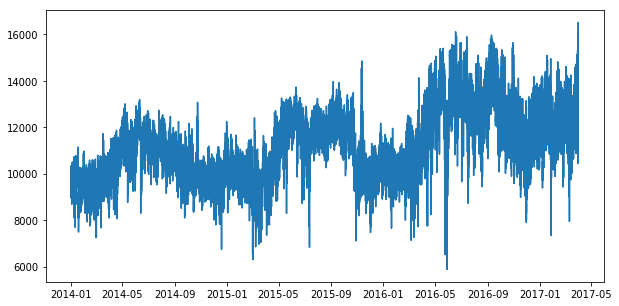

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,5])

df =hourly
ax.plot(df.index,df['Demand'])

data = df['Demand']

In [9]:
#Using Kmeans for clustering 1D data
from sklearn.cluster import KMeans

In [10]:
#Obtaining 8760 demand data in single numpy array
D_train1=data.dropna().values
D_train1

array([ 9601.83496094,  9384.45800781,  8981.4921875 , ...,
       16406.9375    , 15412.1953125 , 15187.69921875])

In [11]:
fc=D_train1.reshape(len(D_train1),1)

In [12]:
#fitting 8 clusters in the above data
kmeans_model = KMeans(n_clusters=8).fit(fc)
print(kmeans_model.cluster_centers_)


[[13377.57726721]
 [10130.77984511]
 [11652.16643587]
 [ 9413.88998226]
 [12429.82817235]
 [14599.31945934]
 [ 8426.21520211]
 [10870.10734411]]


In [14]:
#Y axis -8 centroids
centers = np.array(kmeans_model.cluster_centers_)
#X axis -8 natural numbers
num_of_centers=np.arange(8)

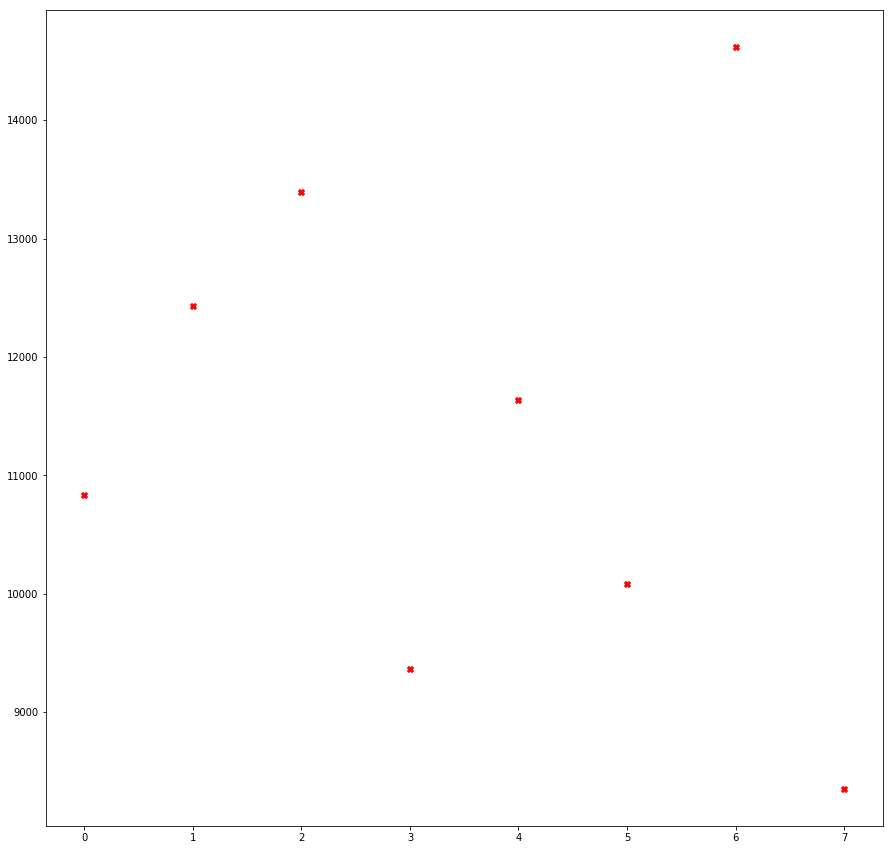

In [15]:
# plotting the figure
plt.figure(figsize=(15,15))

plt.scatter(num_of_centers,centers, marker="X", color='r')
plt.savefig('8_clusters.png') 
plt.show()


In [18]:
# we can also pass an array of values to predict
kmeans_model.predict(18000)


array([6], dtype=int32)

## Clustering and Predicting Hourly Demand in a Year based count of demand data

In [19]:
# importing clustering library
from sklearn.cluster import KMeans

In [20]:
wcss1=[]

In [21]:
X1=data.dropna().values
X1=X1.reshape(len(X1),1)
X1

array([[ 9601.83496094],
       [ 9384.45800781],
       [ 8981.4921875 ],
       ...,
       [16406.9375    ],
       [15412.1953125 ],
       [15187.69921875]])

In [22]:
# Using the elbow method  to find optimal number of clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X1)
    wcss1.append(kmeans.inertia_)

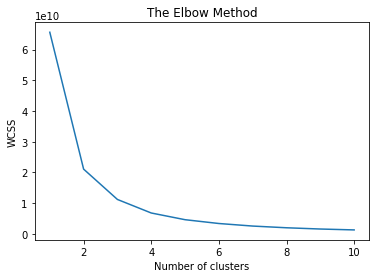

In [23]:
# plotting the elbow graph
plt.plot(range(1, 11), wcss1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
# fitting the data in 8 clusters 
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)
y_kmeans1 = kmeans.fit_predict(X1)
kmeans.cluster_centers_

array([[ 8436.73723039],
       [11631.93066674],
       [13372.29163095],
       [10123.13731063],
       [12416.47201701],
       [14598.29145128],
       [10851.65634258],
       [ 9416.26408059]])

In [25]:
# consists of 8 natural numbers
num=np.arange(8)
num

array([0, 1, 2, 3, 4, 5, 6, 7])

In [26]:
# helps in performing iteration
from itertools import cycle

In [27]:
# making a list which consists of count of data assigned to each of the 8 respective centroid 
c=[]
for k in range(8):
    c.append(len(X1[y_kmeans1==k,0]))
    
c

[1366, 4738, 2499, 5224, 4275, 1195, 4726, 4350]

In [28]:
#converting above list into array as these algos work on arrays only
n=np.asarray(c)
print(type(n))

<class 'numpy.ndarray'>


In [29]:
# xt is a list consists of 8 centroids values
xt=[]
xt=kmeans.cluster_centers_.tolist()
xt

[[8436.737230391534],
 [11631.930666741406],
 [13372.291630945001],
 [10123.137310634293],
 [12416.47201700798],
 [14598.291451284382],
 [10851.656342581875],
 [9416.264080590183]]

In [30]:
# combining the above two list into one
ct=[]
ct=[c,xt]

ct

[[1366, 4738, 2499, 5224, 4275, 1195, 4726, 4350],
 [[8436.737230391534],
  [11631.930666741406],
  [13372.291630945001],
  [10123.137310634293],
  [12416.47201700798],
  [14598.291451284382],
  [10851.656342581875],
  [9416.264080590183]]]

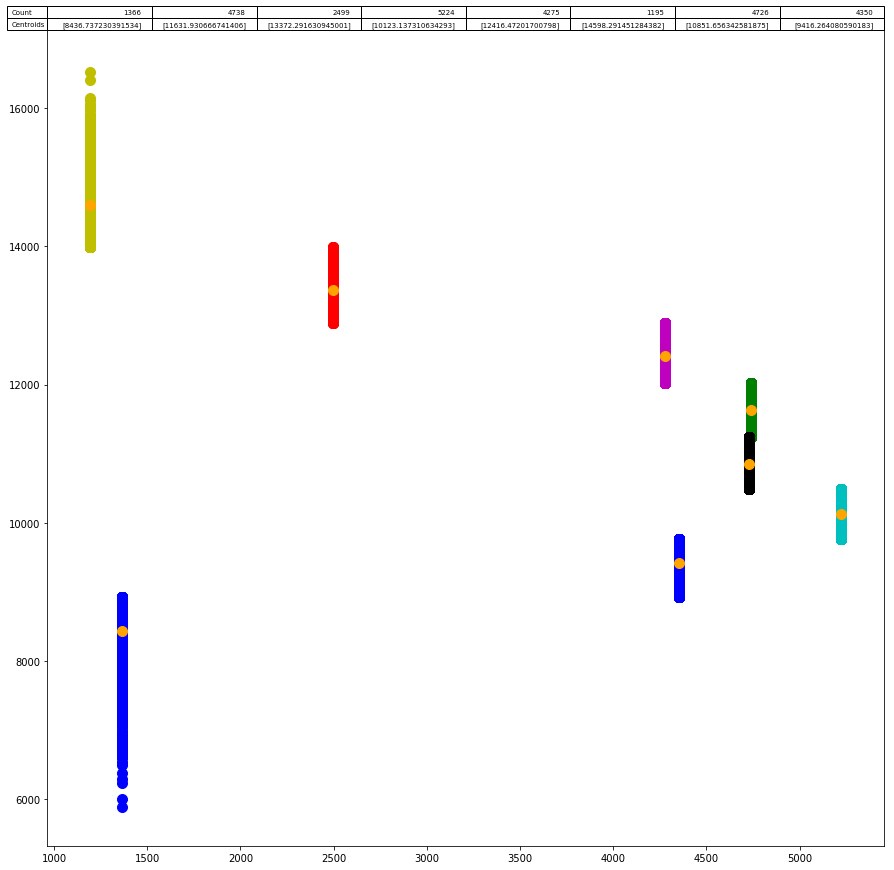

In [31]:
#Defining size of plot
fig = plt.figure(figsize=(15,15))

#calling subplot so to make various plots in same axis
ax1 = fig.add_subplot(111)

#group of colors
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')



for k, col in zip(range(8), colors):
    v=np.array(X1[y_kmeans1==k,0])
    
#For each data point plot it which is assigned to kth centroid with respective to count of values in that cluster
#Plotting clusters and centroids on the same axis 
    for i in range(len(X1[y_kmeans1==k,0])):
       
        ax1.scatter(n[k],v[i],s = 100, c = col , label = 'Cluster 1')
    
    ax1.scatter(n[k],kmeans.cluster_centers_[k],s = 100, c = "orange" , label = 'Cluster 2')

# combining the table consisting of count of data and their respective centroids at top
the_table = ax1.table(cellText=ct,
                      rowLabels=["Count","Centroids"],
                      loc='top')


plt.savefig('Final_Plot.png')
plt.show()

In [33]:
MW=kmeans.cluster_centers_[kmeans_model.predict(15000)-1]
MW

array([[14598.29145128]])

In [34]:
kmeans.cluster_centers_

array([[ 8436.73723039],
       [11631.93066674],
       [13372.29163095],
       [10123.13731063],
       [12416.47201701],
       [14598.29145128],
       [10851.65634258],
       [ 9416.26408059]])

In [35]:
print(len(y_kmeans1))

28373


In [36]:
def triangular(x, a, b, c):
    return max( min( (x-a)/(b-a), (c-x)/(c-b) ), 0 )


In [41]:
demand= {
  'Very Very Small': [5883.2333984375,8436.73723039,8926.212890625,],
    'Very Small': [ 8927.0732421875, 9416.26408059,  9769.453125],
    'Small': [9769.734375, 10123.13731063, 10486.8974609375],
    'Short': [10487.4609375, 10851.65634258,  11241.78125],
    'Medium': [ 11241.78125,11631.93066674,  12023.9873046875],
    'High': [ 12023.9873046875, 12416.47201701,  12894.3564453125],
    'Very High': [ 12894.3564453125,13372.29163095,  13984.486328125],
    'Very Very High': [ 13984.486328125,14598.2914512,  16515.90625]
}

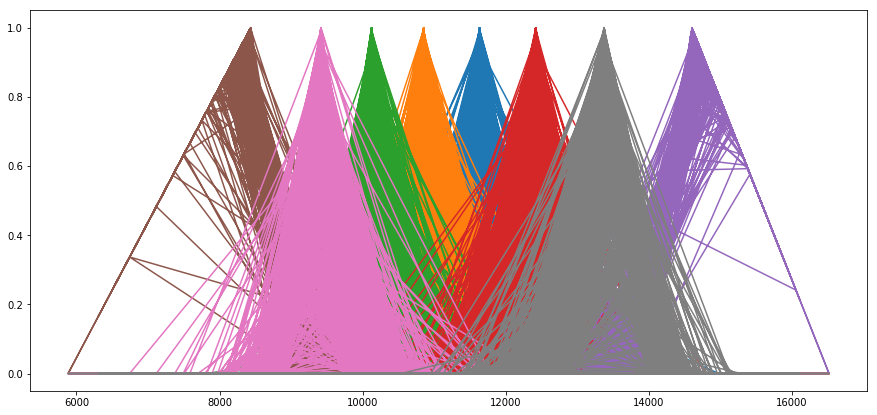

In [47]:
plt.figure(figsize=(15,7))

lines = []

for fuzzy_set in demand.keys():
    memberships = [ triangular(x, *demand[fuzzy_set]) for x in data ]
     # plot the chart
    tmp, = plt.plot(data, memberships, label=fuzzy_set)
    lines.append(tmp)

#legend(handles=lines)
#xlabel("Height")
#ylabel("Membership value")

    

In [39]:
# making a list which consists of count of data assigned to each of the 8 respective centroid 
m=[]
for k in range(8):
    m.append(min(X1[y_kmeans1==k,0]))
    
m

[5883.2333984375,
 11241.8955078125,
 12894.6416015625,
 9769.734375,
 12024.2578125,
 13987.7509765625,
 10487.4609375,
 8927.0732421875]

In [49]:
# making a list which consists of count of data assigned to each of the 8 respective centroid 
o=[]
for k in range(8):
    o.append(max(X1[y_kmeans1==k,0]))
    
o

[8926.212890625,
 12023.9873046875,
 13984.486328125,
 10486.8974609375,
 12894.3564453125,
 16515.90625,
 11241.78125,
 9769.453125]

In [50]:
print(type(memberships))

<class 'list'>


In [51]:
s=set(memberships)
print(type(s))

<class 'set'>


In [52]:
from pyFTS.models import chen

model = chen.ConventionalFTS("Conventional FTS",partitioner=s)
model.fit(data)
print(model)

AttributeError: 'set' object has no attribute 'sets'

In [1]:
import skfuzzy as sf

In [15]:
fcmeans=sf.cluster.cmeans(data=fc,c=10,maxiter=10,m=2)

TypeError: cmeans() missing 1 required positional argument: 'error'

In [ ]:
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()
